In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
def load_data(folder):
    dic={}
    for filename in os.listdir(folder):
        data=pd.read_csv(os.path.join(folder,filename))
        dic[data['Symbol'][0]]=data['Close Price'][0:493].values
    return dic

In [5]:
# Creating dataframe with 30 different stocks,10 from each cap

data=pd.DataFrame(load_data('data'))
data.head()

,ADANIPORTS,ASIANPAINT,BAJFINANCE,BOMDYEING,BPCL,CASTROLIND,CIPLA,CUMMINSIND,DRREDDY,EICHERMOT,...,MINDAIND,MINDTREE,NBCC,PNB,PVR,RBLBANK,RCOM,SUZLON,TATACHEM,WELSPUNIND
0,356.20,1148.05,1332.95,82.20,727.85,449.85,569.00,1066.05,2675.80,28930.60,...,517.90,509.45,197.60,166.80,1524.95,563.90,32.00,19.6,629.80,90.25
1,354.50,1142.85,1347.75,83.40,733.30,443.00,565.60,1047.75,2724.10,29362.50,...,545.60,511.30,198.25,174.15,1539.00,562.60,32.10,19.7,643.90,90.65
2,348.55,1154.95,1324.80,82.25,727.45,439.55,562.35,1016.45,2736.90,29093.55,...,560.10,506.35,200.35,165.05,1530.30,564.25,31.95,19.9,638.10,88.85
3,347.90,1151.35,1314.55,78.95,714.90,433.95,560.10,1054.45,2678.95,28357.30,...,545.25,492.90,194.20,158.50,1515.05,552.15,31.05,20.0,624.90,86.90
4,349.45,1123.15,1289.15,77.15,702.45,437.10,564.95,972.95,2656.45,27936.05,...,560.80,497.50,193.55,155.20,1513.55,555.45,30.55,20.6,616.45,85.05


In [6]:
# Calculating annual average return and volatility of all 30 stocks

daily_return=data.pct_change()*100
daily_return=daily_return.dropna()

ann_mean_rtn=daily_return.mean()*252

vol=daily_return.std()*np.sqrt(252)


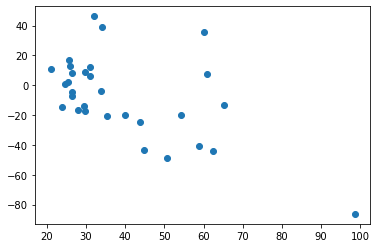

In [7]:
# plot of volatility vs annual average return

plt.scatter(vol,ann_mean_rtn)


In [8]:
# preparation of input to be given in clustering algorithmn

names=pd.Series(vol.index).set_axis(vol.index)
X=pd.concat([names,vol,ann_mean_rtn],axis='columns',keys=['Symbol','Volatility','return'])


In [9]:
X

,Symbol,Volatility,return
ADANIPORTS,ADANIPORTS,30.923542,5.917017
ASIANPAINT,ASIANPAINT,20.949354,10.642798
BAJFINANCE,BAJFINANCE,32.112374,46.203882
BOMDYEING,BOMDYEING,60.179960,35.979361
BPCL,BPCL,43.652177,-24.377580
CASTROLIND,CASTROLIND,44.692026,-43.456813
CIPLA,CIPLA,25.444119,2.224967
CUMMINSIND,CUMMINSIND,29.672692,-17.162261
DRREDDY,DRREDDY,29.798085,8.555219
EICHERMOT,EICHERMOT,29.523472,-13.634968


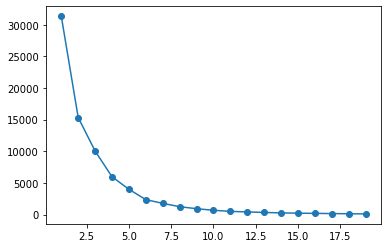

In [12]:
# finding optimum number of cluster using elbow method

from sklearn.cluster import KMeans

w=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit(X.iloc[:,[1,2]])
    w.append(km.inertia_)
    
plt.plot(range(1,20),w,marker='o')  


In [13]:
# found optimum number of cluster is 6 approximatly

km=KMeans(n_clusters=6)
y_pred=km.fit_predict(X.iloc[:,[1,2]])
X['Cluster']=y_pred
X=X.set_index(np.arange(len(vol)))


In [14]:
# Dataframe showing eack stock and associated cluster

print(X)


        Symbol  Volatility     return  Cluster
0   ADANIPORTS   30.923542   5.917017        2
1   ASIANPAINT   20.949354  10.642798        2
2   BAJFINANCE   32.112374  46.203882        1
3    BOMDYEING   60.179960  35.979361        1
4         BPCL   43.652177 -24.377580        3
5   CASTROLIND   44.692026 -43.456813        0
6        CIPLA   25.444119   2.224967        2
7   CUMMINSIND   29.672692 -17.162261        3
8      DRREDDY   29.798085   8.555219        2
9    EICHERMOT   29.523472 -13.634968        3
10    EXIDEIND   26.312995  -4.574056        3
11        GAIL   33.819019  -3.841133        3
12   GODREJIND   26.541909  -7.005223        3
13    HDFCBANK   25.707644  16.560805        2
14  HEROMOTOCO   23.938011 -14.454112        3
15        IDFC   35.420565 -20.770764        3
16         IGL   65.176724 -13.567667        4
17  JETAIRWAYS   62.275626 -43.929949        0
18   JKLAKSHMI   27.992671 -16.613905        3
19  LALPATHLAB   26.468119   7.945279        2
20    MINDAIN

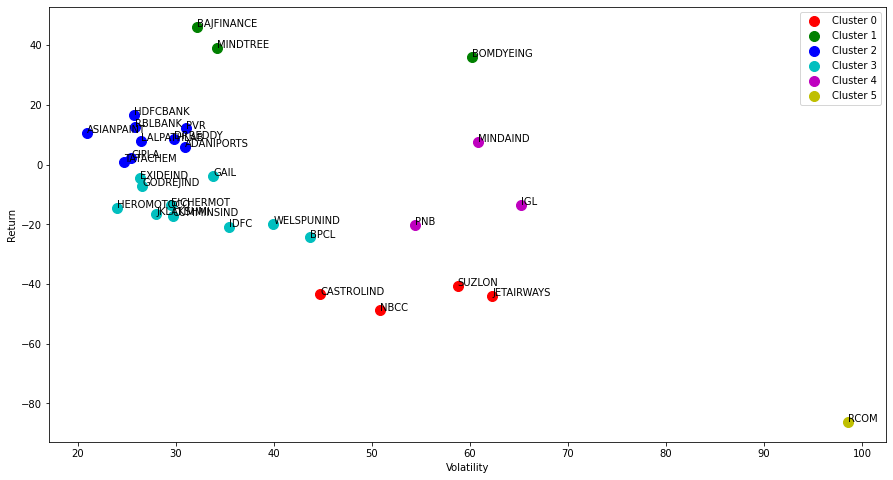

In [15]:
# plotting of Clusters

plt.figure(figsize=(15,8))
plt.scatter(X.iloc[y_pred==0,1],X.iloc[y_pred==0,2],c='r',label='Cluster 0',s=100)
plt.scatter(X.iloc[y_pred==1,1],X.iloc[y_pred==1,2],c='g',label='Cluster 1',s=100)
plt.scatter(X.iloc[y_pred==2,1],X.iloc[y_pred==2,2],c='b',label='Cluster 2',s=100)
plt.scatter(X.iloc[y_pred==3,1],X.iloc[y_pred==3,2],c='c',label='Cluster 3',s=100)
plt.scatter(X.iloc[y_pred==4,1],X.iloc[y_pred==4,2],c='m',label='Cluster 4',s=100)
plt.scatter(X.iloc[y_pred==5,1],X.iloc[y_pred==5,2],c='y',label='Cluster 5',s=100)
plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Return')
for name,vol,rtn in zip(X['Symbol'],X['Volatility'],X['return']):
    plt.text(vol,rtn,name)
